<a href="https://colab.research.google.com/github/fxrdhan/Machine-Learning-Project/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Firdaus_Arif_Ramadhani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Dataset Introduction**

**Air Quality Measurements Dataset**

1.  Description

    This dataset contains detailed air quality measurements collected over a specified period. It focuses on various pollutants, providing a comprehensive overview of air quality metrics.

2. Feature	Description

  - Date: The date of the measurement.
  - Time: The time of the measurement.
  - CO(GT): Concentration of carbon monoxide (CO) in the air (µg/m³).
  - PT08.S1(CO):	Sensor measurement for CO concentration.
  - NMHC(GT):	Concentration of non-methane hydrocarbons (NMHC) (µg/m³).
  - C6H6(GT):	Concentration of benzene (C6H6) in the air (µg/m³).
  - PT08.S2(NMHC):	Sensor measurement for NMHC concentration.
  - NOx(GT):	Concentration of nitrogen oxides (NOx) in the air (µg/m³).
  - PT08.S3(NOx):	Sensor measurement for NOx concentration.
  - NO2(GT):	Concentration of nitrogen dioxide (NO2) in the air (µg/m³).

  Missing Attribute Values
  - Some measurements may be recorded as -200, indicating missing or invalid data points.
3. Total Rows: 9357
4. Source: [Kaggle](https://www.kaggle.com/datasets/dakshbhalala/uci-air-quality-dataset/data)

# **2. Import Library**

In [ ]:
!python --version

Python 3.12.12


In [ ]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn yellowbrick scipy

In [ ]:
# System and Settings
import time
import warnings
warnings.filterwarnings('ignore')

# Core Data Processing Libraries
import numpy as np
import pandas as pd
# Configure pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
## Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

## Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Dimensionality Reduction
from sklearn.decomposition import PCA

## Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Statistical Analysis
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.spatial.distance import cdist

# **3. Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AirQualityUCI.csv")

In [ ]:
# CRITICAL FIX: Replace -200 (missing value marker) with NaN
# According to dataset documentation, -200 indicates missing/invalid data

# First, drop unnecessary columns
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, errors='ignore')

# Replace -200 with NaN in all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].replace(-200, np.nan)

# Check how many missing values we have now
print("Missing values after replacing -200 with NaN:")
print(df.isnull().sum())
print(f"\nTotal rows with at least one missing value: {df.isnull().any(axis=1).sum()}")

Missing values after replacing -200 with NaN:
Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

Total rows with at least one missing value: 8644


In [ ]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00   2.600     1360.000   150.000    11.900   
1  3/10/2004  19:00:00   2.000     1292.000   112.000     9.400   
2  3/10/2004  20:00:00   2.200     1402.000    88.000     9.000   
3  3/10/2004  21:00:00   2.200     1376.000    80.000     9.200   
4  3/10/2004  22:00:00   1.600     1272.000    51.000     6.500   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0       1046.000  166.000      1056.000  113.000      1692.000     1268.000   
1        955.000  103.000      1174.000   92.000      1559.000      972.000   
2        939.000  131.000      1140.000  114.000      1555.000     1074.000   
3        948.000  172.000      1092.000  122.000      1584.000     1203.000   
4        836.000  131.000      1205.000  116.000      1490.000     1110.000   

       T     RH    AH  
0 13.600 48.900 0.758  
1 13.300 47.700 0.726  
2 11.900 54.000 0.750  
3 11.000 60.000 0.787  
4 11.200 59.600 0.789

# **4. Exploratory Data Analysis (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [ ]:
df.sample(5)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
4810   9/27/2004   4:00:00   0.600      820.000       NaN     3.400   
6190  11/23/2004  16:00:00   5.300     1658.000       NaN    27.100   
6206  11/24/2004   8:00:00   3.800     1414.000       NaN    18.700   
7739   1/27/2005   5:00:00   0.400      778.000       NaN     0.300   
8262   2/18/2005   0:00:00   1.200      975.000       NaN     3.300   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
4810        674.000  104.000      1024.000   64.000      1188.000   
6190       1482.000  898.000       419.000  186.000      1893.000   
6206       1261.000  717.000       532.000  114.000      1644.000   
7739        417.000   27.000      1531.000   26.000       745.000   
8262        670.000  129.000       943.000  105.000       910.000   

      PT08.S5(O3)      T     RH    AH  
4810      790.000 14.000 62.600 0.995  
6190     2030.000 14.200 67.800 1.088  
6206     1479.000  9.800 80.500 0.972  
7739      312.000  4.100 45.900 0.380  
8262      616.000  6.900 48.700 0.487

In [ ]:
df.describe()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
count 7674.000     8991.000   914.000  8991.000       8991.000 7718.000   
mean     2.153     1099.833   218.812    10.083        939.153  246.897   
std      1.453      217.080   204.460     7.450        266.831  212.979   
min      0.100      647.000     7.000     0.100        383.000    2.000   
25%      1.100      937.000    67.000     4.400        734.500   98.000   
50%      1.800     1063.000   150.000     8.200        909.000  180.000   
75%      2.900     1231.000   297.000    14.000       1116.000  326.000   
max     11.900     2040.000  1189.000    63.700       2214.000 1479.000   

       PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)        T       RH  \
count      8991.000 7715.000      8991.000     8991.000 8991.000 8991.000   
mean        835.494  113.091      1456.265     1022.906   18.318   49.234   
std         256.817   48.370       346.207      398.484    8.832   17.317   
min         322.000    2.000       551.000      221.000   -1.900    9.200   
25%         658.000   78.000      1227.000      731.500   11.800   35.800   
50%         806.000  109.000      1463.000      963.000   17.800   49.600   
75%         969.500  142.000      1674.000     1273.500   24.400   62.500   
max        2683.000  340.000      2775.000     2523.000   44.600   88.700   

            AH  
count 8991.000  
mean     1.026  
std      0.404  
min      0.185  
25%      0.737  
50%      0.995  
75%      1.314  
max      2.231

In [ ]:
df.isnull().sum()

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(113)

In [ ]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, errors='ignore')

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.columns.tolist()

['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [ ]:
# winsorization
for col in df.select_dtypes(include='number').columns:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

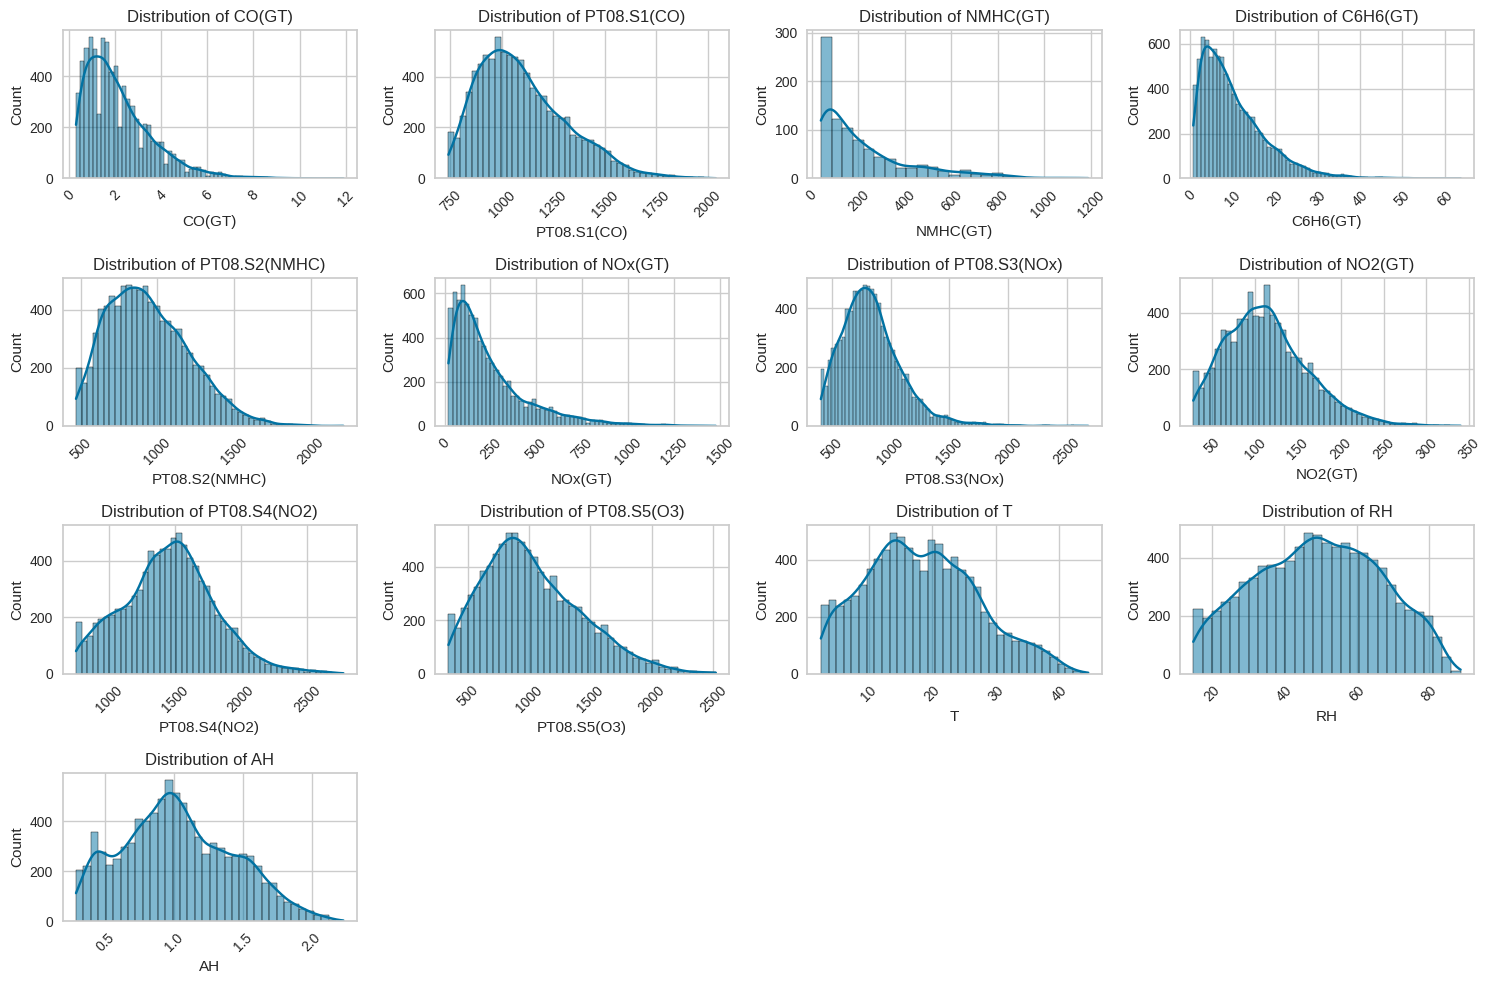

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_df, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Most features show a right-skewed distribution.
- Features like T (Temperature), RH (Relative Humidity), and AH (Absolute Humidity) show a more symmetric distribution.

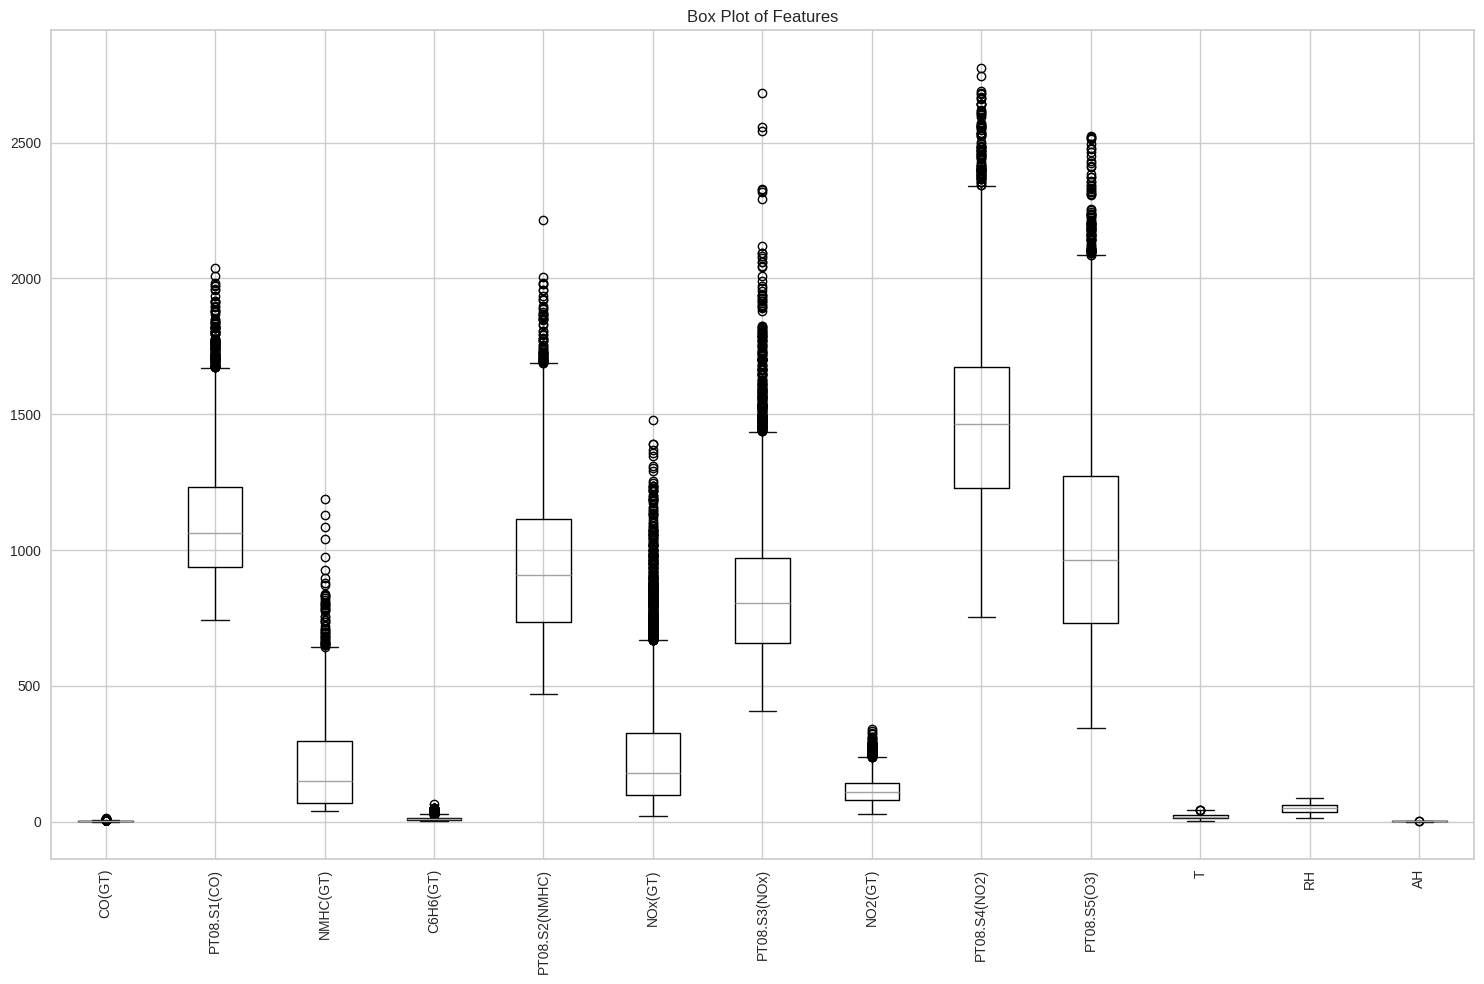

In [ ]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.tight_layout()
plt.show()

**Insight:**
- Several features, such as NMHC(GT) and NOx(GT), have significant outliers that are far from the interquartile range (IQR).
- Features like C6H6(GT) and CO(GT) have a wide spread, indicating substantial variability in the data.

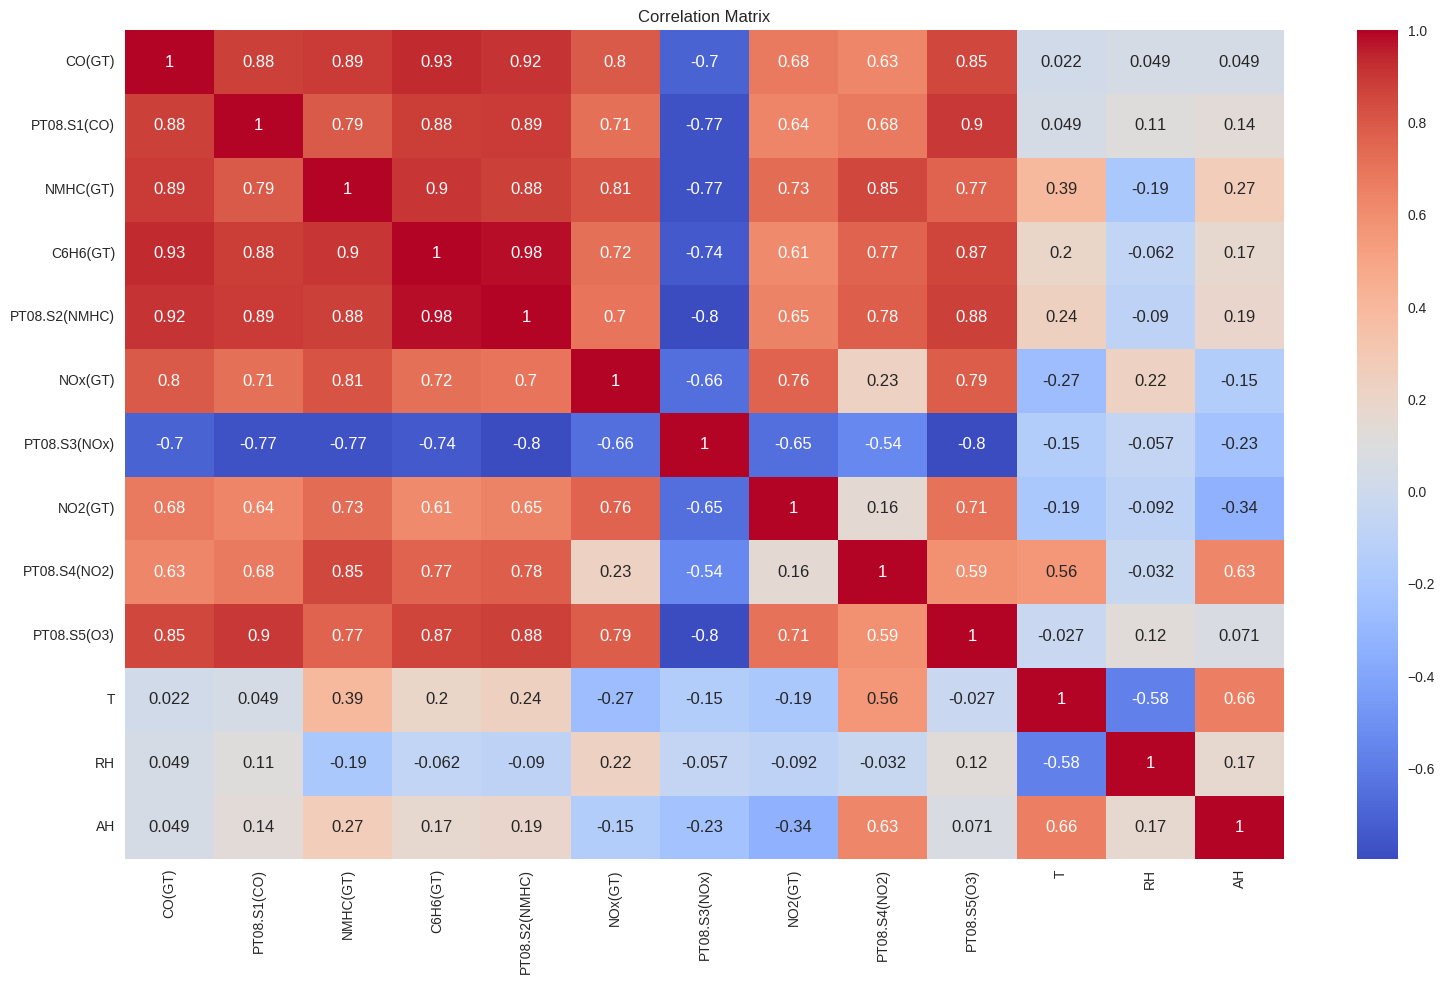

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

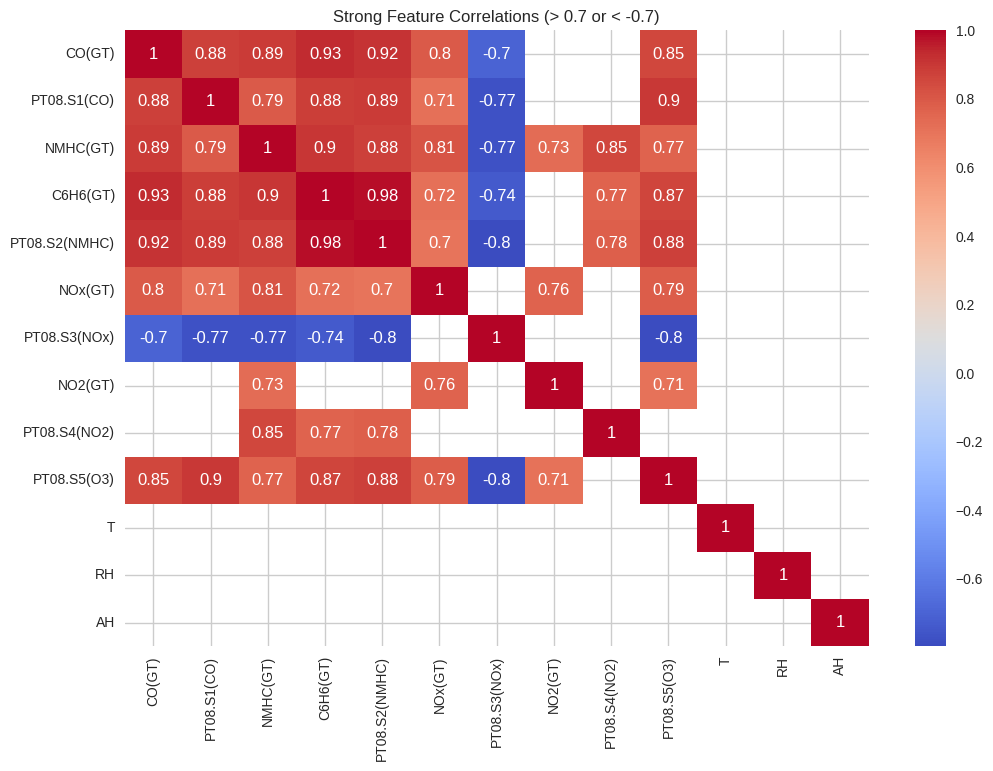

In [ ]:
# Filter for strong correlations
correlation_matrix = numeric_df.corr()
strong_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Strong Feature Correlations (> 0.7 or < -0.7)')
plt.show()

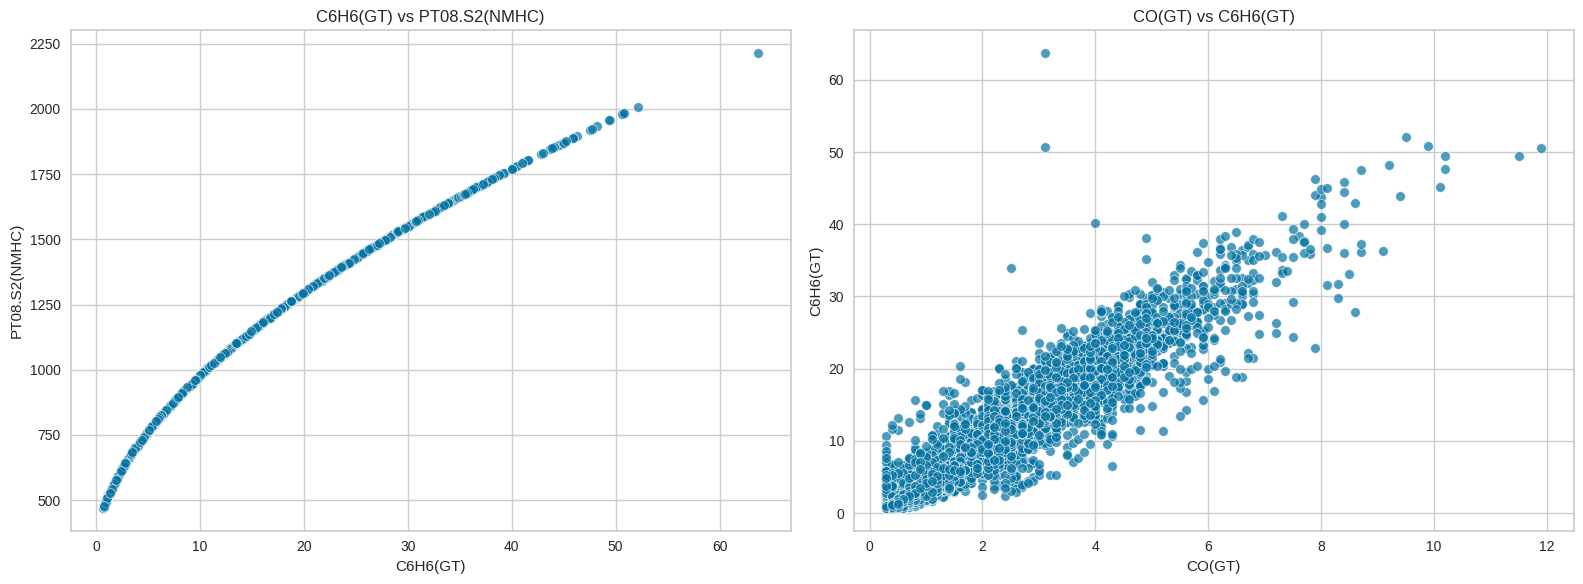

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# C6H6(GT) vs PT08.S2(NMHC)
sns.scatterplot(ax=axes[0], x='C6H6(GT)', y='PT08.S2(NMHC)', data=df, alpha=0.7)
axes[0].set_title('C6H6(GT) vs PT08.S2(NMHC)')
axes[0].set_xlabel('C6H6(GT)')
axes[0].set_ylabel('PT08.S2(NMHC)')

# CO(GT) vs C6H6(GT)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='C6H6(GT)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs C6H6(GT)')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('C6H6(GT)')

plt.tight_layout()
plt.show()

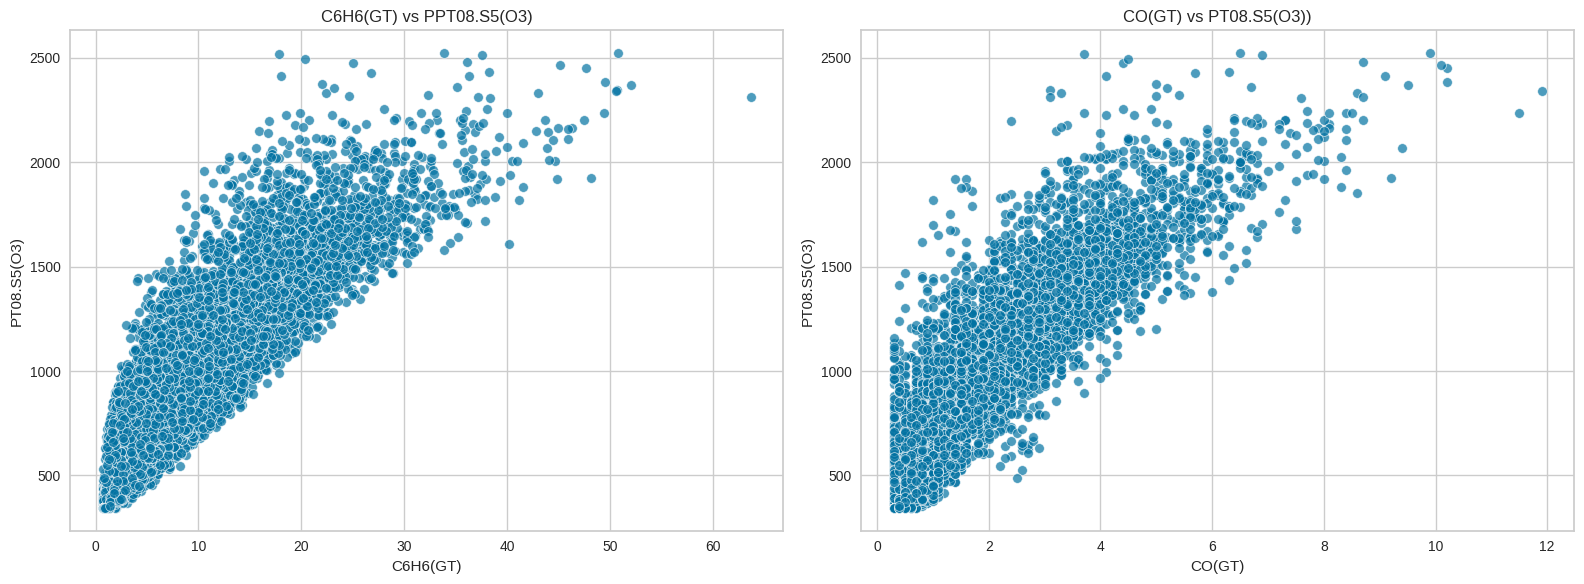

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# C6H6(GT) vs PT08.S5(O3)
sns.scatterplot(ax=axes[0], x='C6H6(GT)', y='PT08.S5(O3)', data=df, alpha=0.7)
axes[0].set_title('C6H6(GT) vs PPT08.S5(O3)')
axes[0].set_xlabel('C6H6(GT)')
axes[0].set_ylabel('PT08.S5(O3)')

# CO(GT) vs PT08.S5(O3)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='PT08.S5(O3)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs PT08.S5(O3))')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('PT08.S5(O3)')

plt.tight_layout()
plt.show()

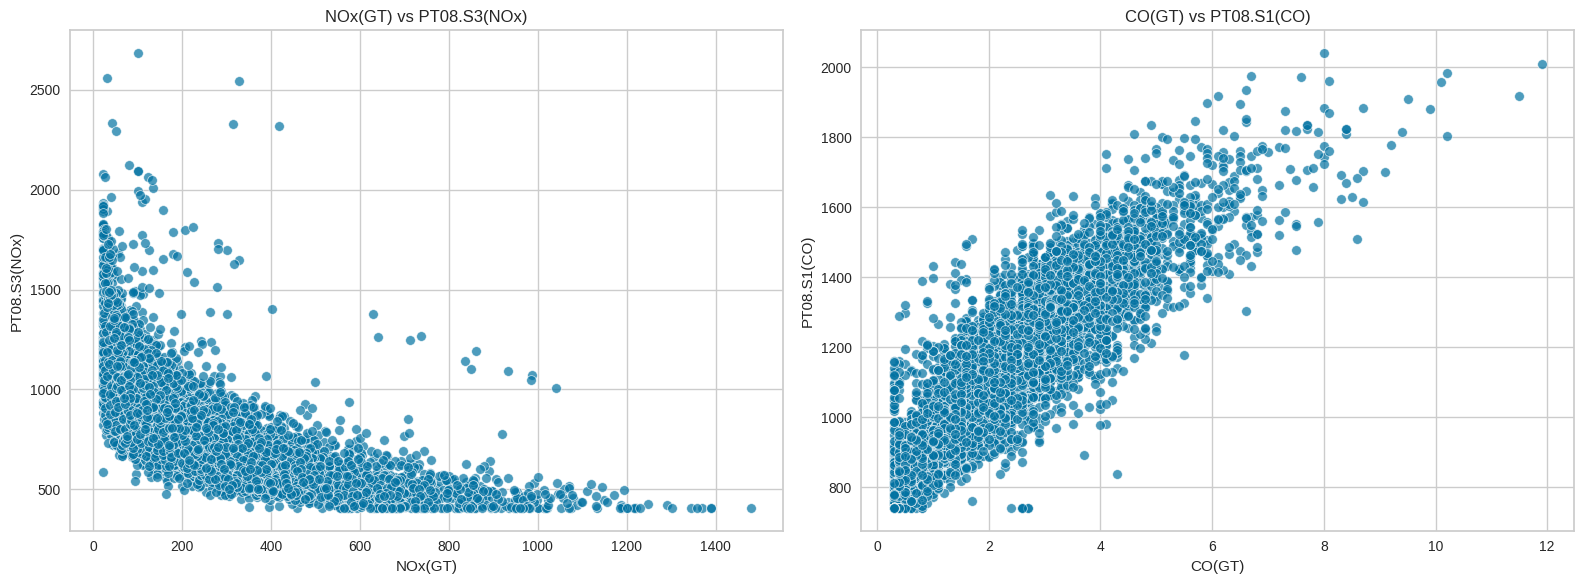

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# NOx(GT) vs PT08.S3(NOx)
sns.scatterplot(ax=axes[0], x='NOx(GT)', y='PT08.S3(NOx)', data=df, alpha=0.7)
axes[0].set_title('NOx(GT) vs PT08.S3(NOx)')
axes[0].set_xlabel('NOx(GT)')
axes[0].set_ylabel('PT08.S3(NOx)')

# CO(GT) vs PT08.S1(CO)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='PT08.S1(CO)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs PT08.S1(CO)')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('PT08.S1(CO)')

plt.tight_layout()
plt.show()

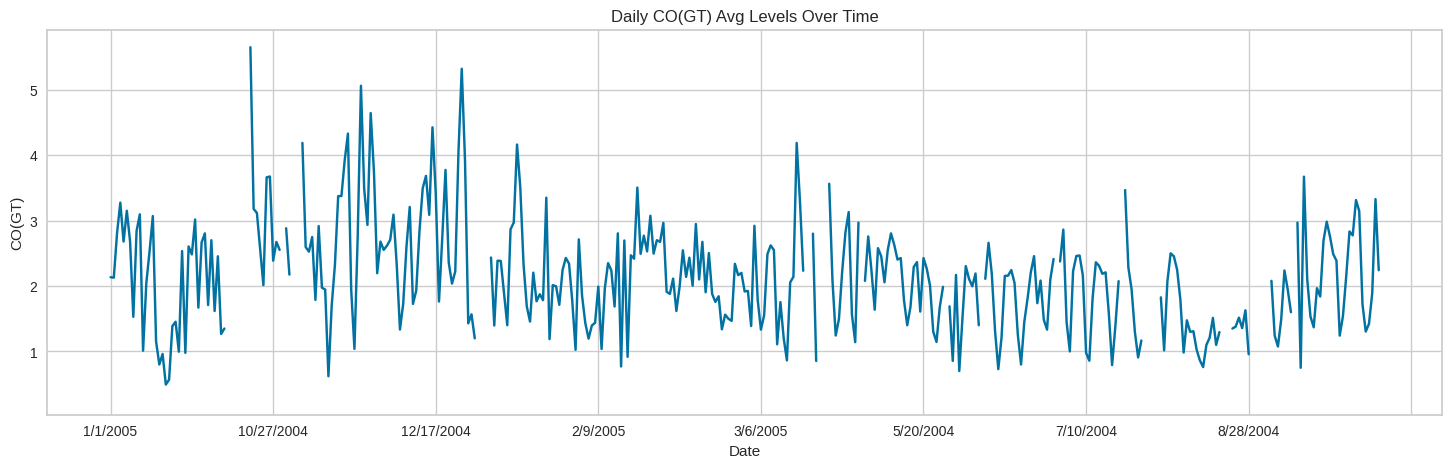

In [ ]:
daily_avg = df.groupby('Date')['CO(GT)'].mean()

plt.figure(figsize=(18, 5))
daily_avg.plot(kind='line')
plt.title('Daily CO(GT) Avg Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()

# **5. Data Preprocessing**

## Remove Duplicated Rows & Missing Values

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# FIXED: Drop NMHC(GT) column first (>90% missing values)
# Then drop remaining rows with NaN
df = df.drop('NMHC(GT)', axis=1, errors='ignore')
df.dropna(inplace=True)
print(f"Data shape after dropping NMHC(GT) and remaining NaN: {df.shape}")

Data shape after dropping NMHC(GT) and remaining NaN: (6941, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6941 non-null   object 
 1   Time           6941 non-null   object 
 2   CO(GT)         6941 non-null   float64
 3   PT08.S1(CO)    6941 non-null   float64
 4   C6H6(GT)       6941 non-null   float64
 5   PT08.S2(NMHC)  6941 non-null   float64
 6   NOx(GT)        6941 non-null   float64
 7   PT08.S3(NOx)   6941 non-null   float64
 8   NO2(GT)        6941 non-null   float64
 9   PT08.S4(NO2)   6941 non-null   float64
 10  PT08.S5(O3)    6941 non-null   float64
 11  T              6941 non-null   float64
 12  RH             6941 non-null   float64
 13  AH             6941 non-null   float64
dtypes: float64(12), object(2)
memory usage: 813.4+ KB


## Feature Engineering

In [ ]:
# Create a new feature by combining 'CO(GT)' and 'PT08.S1(CO)'
df['CO_Product'] = df['CO(GT)'] * df['PT08.S1(CO)']
df['CO_Avg'] = (df['CO(GT)'] + df['PT08.S1(CO)']) / 2
df['CO_Ratio'] = df['CO(GT)'] / (df['PT08.S1(CO)'] + 1e-6)

df[['CO_Product', 'CO_Avg', 'CO_Ratio']].describe()

CO_Product   CO_Avg  CO_Ratio
count    6941.000 6941.000  6941.000
mean     2722.100  561.187     0.002
std      2381.936  109.742     0.001
min       222.300  370.650     0.000
25%      1075.000  479.000     0.001
50%      2023.500  543.450     0.002
75%      3627.900  628.500     0.002
max     23895.200 1024.000     0.006

In [ ]:
# NMHC features removed because NMHC(GT) column was dropped (>90% missing values)
# Original code:
# df['NMHC_Product'] = df['NMHC(GT)'] * df['PT08.S2(NMHC)']
# df['NMHC_Avg'] = (df['NMHC(GT)'] + df['PT08.S2(NMHC)']) / 2
# df['NMHC_Ratio'] = df['NMHC(GT)'] / (df['PT08.S2(NMHC)'] + 1e-6)
print("NMHC feature engineering skipped - column was dropped due to >90% missing values")

NMHC feature engineering skipped - column was dropped due to >90% missing values


In [ ]:
# Total Polutan - FIXED: Removed NMHC(GT) since it was dropped
df['Total_Polutan'] = df[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']].sum(axis=1)

df['Total_Polutan'].describe()

count   6941.000
mean     377.419
std      252.954
min       50.000
25%      195.100
50%      312.600
75%      490.800
max     1808.700
Name: Total_Polutan, dtype: float64

In [ ]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract temporal components
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)  # Binary feature: 1 for weekend, 0 for weekday

df[['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend']].sample(5)

Year  Month  Day  Hour  DayOfWeek  IsWeekend
275   2004      3   22     5          0          0
6234  2004     11   25    12          3          0
5129  2004     10   10    11          6          1
4369  2004      9    8    19          2          0
1577  2004      5   15    11          5          1

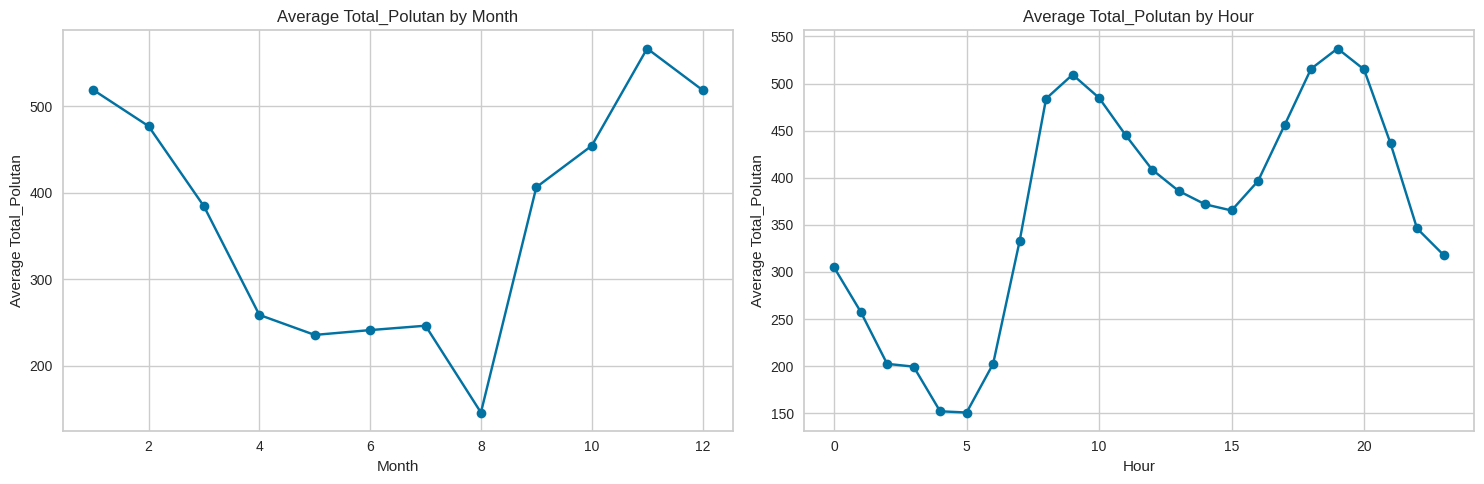

In [ ]:
monthly_avg = df.groupby('Month')['Total_Polutan'].mean()
hourly_avg = df.groupby('Hour')['Total_Polutan'].mean()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
monthly_avg.plot(kind='line', marker='o')
plt.title('Average Total_Polutan by Month')
plt.xlabel('Month')
plt.ylabel('Average Total_Polutan')
plt.grid(True)

plt.subplot(1, 2, 2)
hourly_avg.plot(kind='line', marker='o')
plt.title('Average Total_Polutan by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Total_Polutan')
plt.grid(True)

plt.tight_layout()
plt.show()

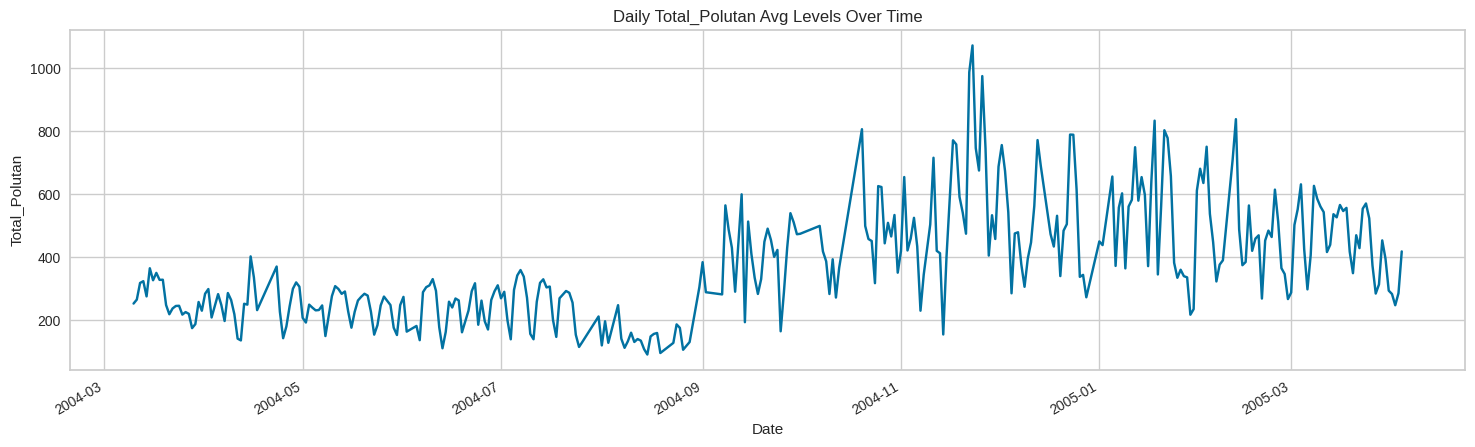

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
daily_avg = df.groupby('Date')['Total_Polutan'].mean()

plt.figure(figsize=(18, 5))
daily_avg.plot(kind='line')
plt.title('Daily Total_Polutan Avg Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Total_Polutan')
plt.grid(True)
plt.show()

## Handle Outliers

In [ ]:
# 1. Replace -200 with NaN
df = df.replace(-200, np.nan)

# 2. Linear interpolation for short gaps (3 periods)
df = df.interpolate(method='linear', limit=3)

# 3. Forward fill for medium gaps (6 periods)
df = df.fillna(method='ffill', limit=6)

# 4. Use seasonal mean for long gaps
df['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
# Group by hour and calculate mean for each column separately
seasonal_mean = df.groupby('hour')[df.select_dtypes(include=[np.number]).columns].transform('mean')
df = df.fillna(value=seasonal_mean)
df = df.drop('hour', axis=1)

# 5. If any NaN remains, use backward fill
df = df.fillna(method='bfill')

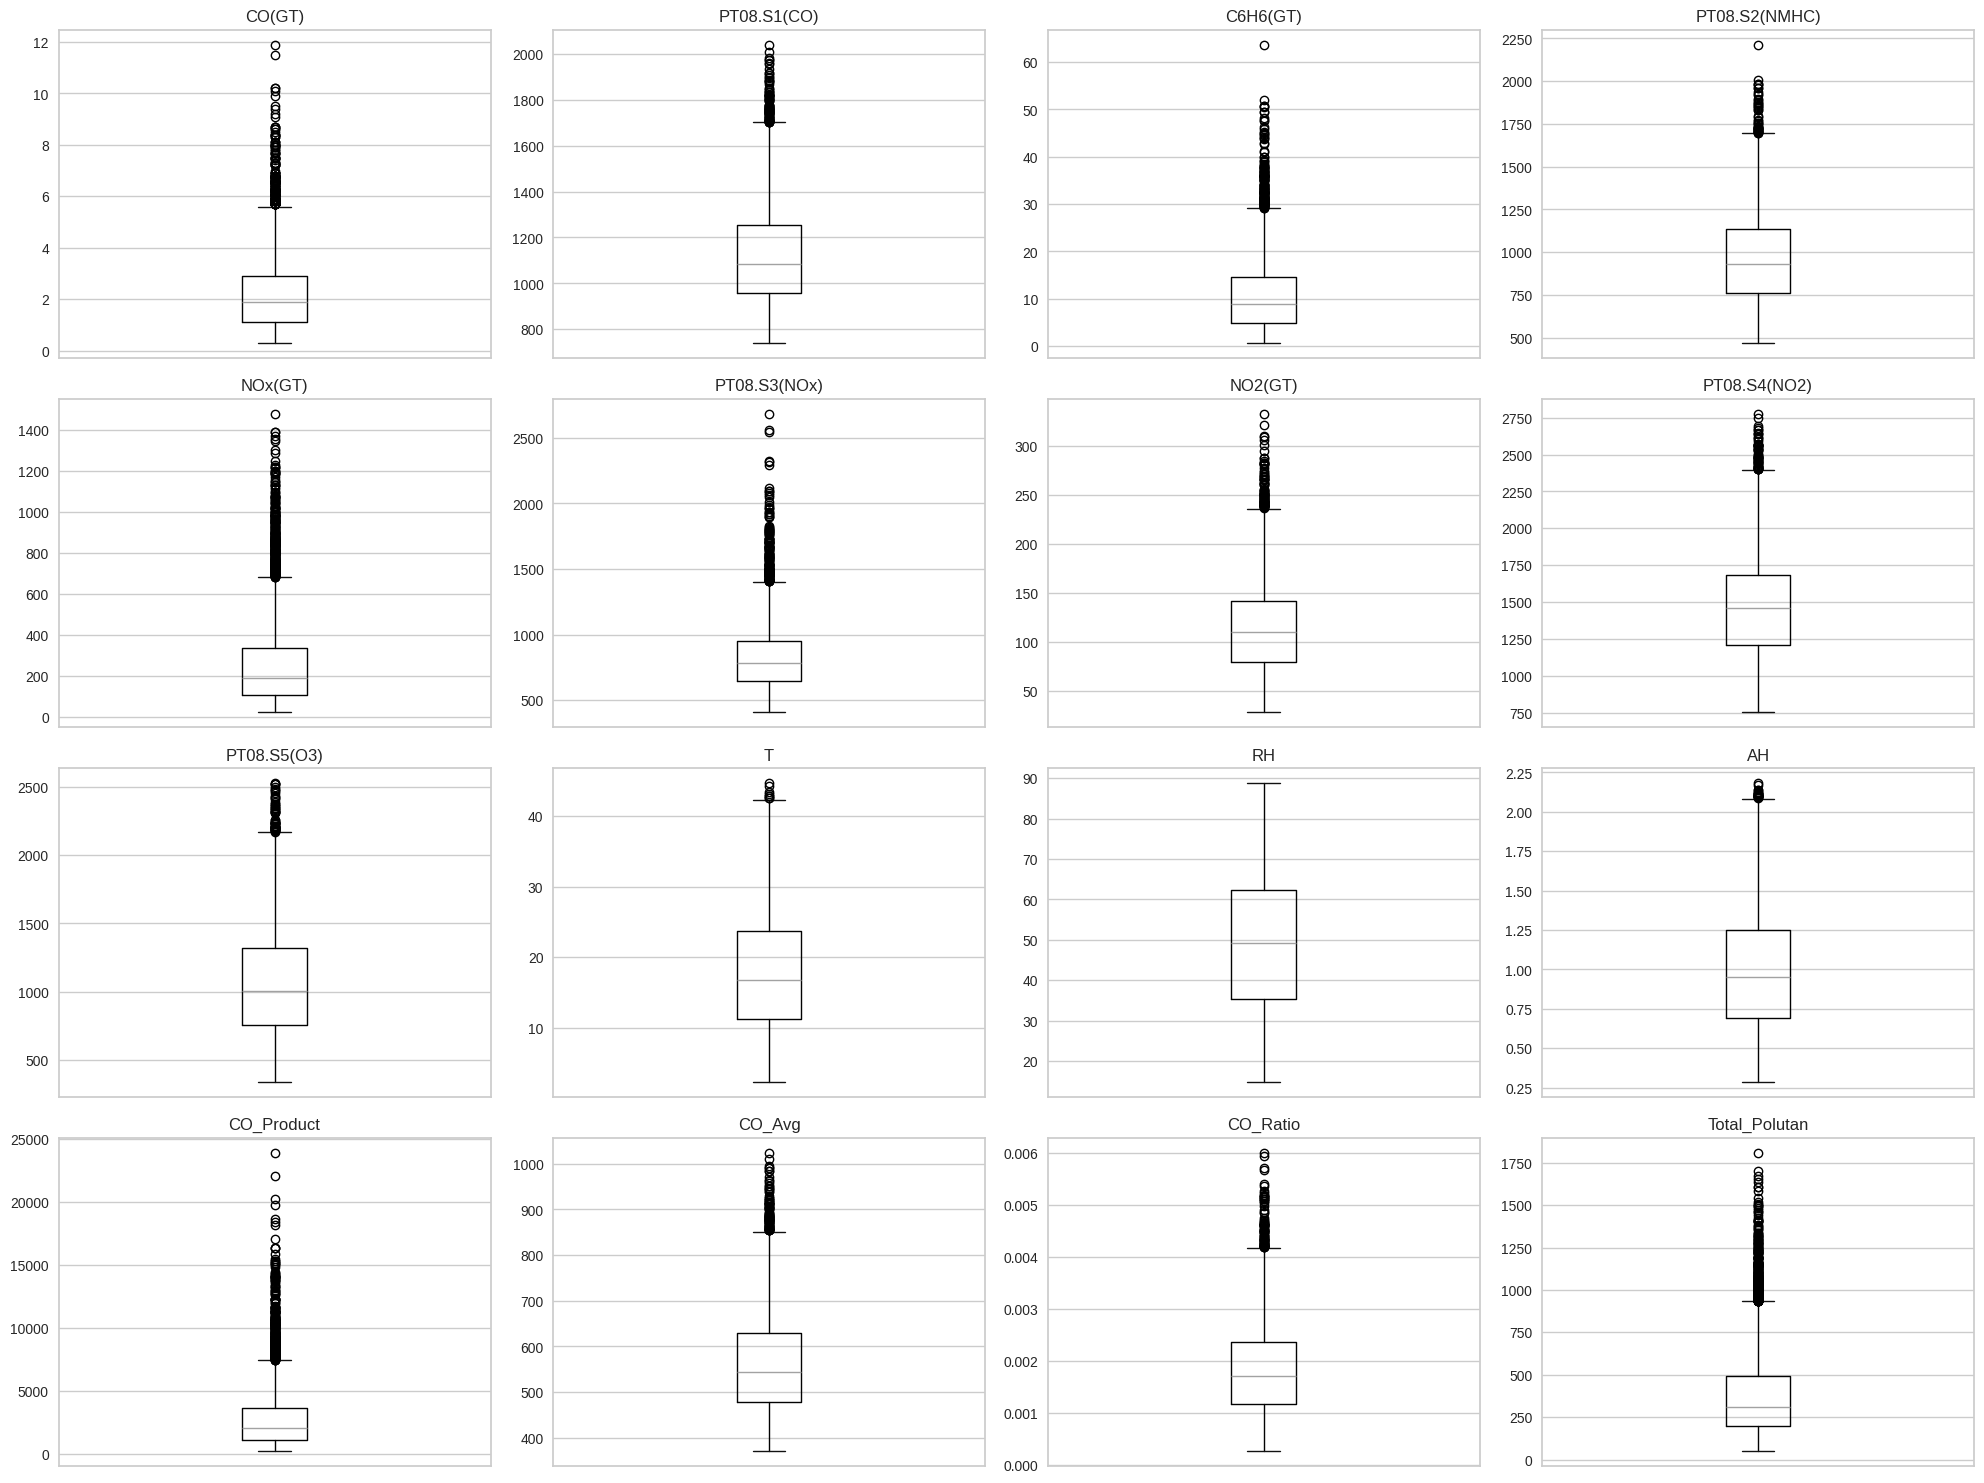

In [ ]:
float_features = df.select_dtypes(include='float')

num_features = len(float_features.columns)
num_cols = 4
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(float_features.columns):
    float_features.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xticks([])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Encoding

In [ ]:
# Binary Encoding for DayOfWeek
df['DayOfWeek_binary'] = df['DayOfWeek'].apply(lambda x: format(x, '03b'))

binary_columns = ['DayOfWeek_bit0', 'DayOfWeek_bit1', 'DayOfWeek_bit2']
df[binary_columns] = df['DayOfWeek_binary'].apply(lambda x: pd.Series(list(x))).astype(int)

df.drop(['DayOfWeek_binary'], axis=1, inplace=True)
df.drop(['DayOfWeek'], axis=1, inplace=True)

df.head()

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10  18:00:00   2.600     1360.000    11.900       1046.000  166.000   
1 2004-03-10  19:00:00   2.000     1292.000     9.400        955.000  103.000   
2 2004-03-10  20:00:00   2.200     1402.000     9.000        939.000  131.000   
3 2004-03-10  21:00:00   2.200     1376.000     9.200        948.000  172.000   
4 2004-03-10  22:00:00   1.600     1272.000     6.500        836.000  131.000   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T     RH    AH  \
0      1056.000  113.000      1692.000     1268.000 13.600 48.900 0.758   
1      1174.000   92.000      1559.000      972.000 13.300 47.700 0.726   
2      1140.000  114.000      1555.000     1074.000 11.900 54.000 0.750   
3      1092.000  122.000      1584.000     1203.000 11.000 60.000 0.787   
4      1205.000  116.000      1490.000     1110.000 11.200 59.600 0.789   

   CO_Product  CO_Avg  CO_Ratio  Total_Polutan            Datetime  Year  \
0    3536.000 681.300     0.002        293.500 2004-03-10 18:00:00  2004   
1    2584.000 647.000     0.002        206.400 2004-03-10 19:00:00  2004   
2    3084.400 702.100     0.002        256.200 2004-03-10 20:00:00  2004   
3    3027.200 689.100     0.002        305.400 2004-03-10 21:00:00  2004   
4    2035.200 636.800     0.001        255.100 2004-03-10 22:00:00  2004   

   Month  Day  Hour  IsWeekend  DayOfWeek_bit0  DayOfWeek_bit1  DayOfWeek_bit2  
0      3   10    18          0               0               1               0  
1      3   10    19          0               0               1               0  
2      3   10    20          0               0               1               0  
3      3   10    21          0               0               1               0  
4      3   10    22          0               0               1               0

In [ ]:
# Label Encoding for Time
le = LabelEncoder()
df['Time'] = le.fit_transform(df['Time'])

In [ ]:
# Cyclic Encoding for Hour & Month
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

## Data Binning

In [ ]:
# Binning for CO(GT)
bins_co = [0, 2, 5, 12]
labels_co = ['Low', 'Medium', 'High']
df['CO_Category'] = pd.cut(df['CO(GT)'], bins=bins_co, labels=labels_co)

# Binning for T (Temperature)
df['Temperature_Category'] = pd.qcut(df['T'], q=3, labels=['Cold', 'Moderate', 'Hot'])

# Binning for NO2(GT)
bins_no2 = [0, 100, 200, 340]
labels_no2 = ['Low', 'Medium', 'High']
df['NO2_Category'] = pd.cut(df['NO2(GT)'], bins=bins_no2, labels=labels_no2)

# Binning for Hour (Time of Day)
def categorize_hour(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['Time_of_Day'] = df['Hour'].apply(lambda x: categorize_hour(x))

# Binning for C6H6(GT)
bins_c6h6 = [0, 10, 30, 64]
labels_c6h6 = ['Low', 'Medium', 'High']
df['C6H6_Category'] = pd.cut(df['C6H6(GT)'], bins=bins_c6h6, labels=labels_c6h6)

df[['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']].sample(5)

CO_Category Temperature_Category NO2_Category Time_of_Day C6H6_Category
9214      Medium             Moderate       Medium   Afternoon        Medium
691       Medium             Moderate       Medium   Afternoon        Medium
4403         Low                  Hot          Low       Night           Low
3756         Low                  Hot          Low     Morning           Low
6887      Medium                 Cold       Medium   Afternoon        Medium

In [ ]:
df['Time_of_Day'].value_counts()

Time_of_Day
Evening      1849
Morning      1843
Afternoon    1841
Night        1408
Name: count, dtype: int64

In [ ]:
# Label encoding for each binned column
label_cols = ['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df[['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']].sample(5)

CO_Category  Temperature_Category  NO2_Category  Time_of_Day  \
4394            2                     1             2            1   
2307            1                     1             1            1   
6309            1                     2             1            0   
7902            1                     0             2            3   
4183            1                     1             1            3   

      C6H6_Category  
4394              2  
2307              1  
6309              1  
7902              1  
4183              1

In [ ]:
columns_to_drop = ['Datetime', 'Date', 'Time', 'Month', 'Hour']
df.drop(columns=columns_to_drop, inplace=True)

df.describe()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
count 6941.000     6941.000  6941.000       6941.000 6941.000      6941.000   
mean     2.184     1120.191    10.556        958.767  250.720       817.290   
std      1.439      218.219     7.463        263.621  208.557       251.211   
min      0.300      741.000     0.700        470.000   21.000       407.000   
25%      1.100      956.000     4.900        760.000  103.000       642.000   
50%      1.900     1085.000     8.800        931.000  186.000       786.000   
75%      2.900     1254.000    14.600       1135.000  335.000       947.000   
max     11.900     2040.000    63.700       2214.000 1479.000      2683.000   

       NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)        T       RH       AH  \
count 6941.000      6941.000     6941.000 6941.000 6941.000 6941.000   
mean   113.959      1453.242     1058.091   17.771   48.900    0.986   
std     47.309       352.043      405.896    8.817   17.396    0.400   
min     28.000       753.000      344.000    2.400   14.900    0.288   
25%     79.000      1207.000      760.000   11.200   35.300    0.694   
50%    110.000      1457.000     1006.000   16.800   49.200    0.954   
75%    142.000      1683.000     1322.000   23.700   62.200    1.252   
max    333.000      2775.000     2523.000   44.600   88.700    2.181   

       CO_Product   CO_Avg  CO_Ratio  Total_Polutan     Year      Day  \
count    6941.000 6941.000  6941.000       6941.000 6941.000 6941.000   
mean     2722.100  561.187     0.002        377.419 2004.281   15.997   
std      2381.936  109.742     0.001        252.954    0.449    8.708   
min       222.300  370.650     0.000         50.000 2004.000    1.000   
25%      1075.000  479.000     0.001        195.100 2004.000    9.000   
50%      2023.500  543.450     0.002        312.600 2004.000   16.000   
75%      3627.900  628.500     0.002        490.800 2005.000   24.000   
max     23895.200 1024.000     0.006       1808.700 2005.000   31.000   

       IsWeekend  DayOfWeek_bit0  DayOfWeek_bit1  DayOfWeek_bit2  Hour_sin  \
count   6941.000        6941.000        6941.000        6941.000  6941.000   
mean       0.299           0.443           0.420           0.428    -0.048   
std        0.458           0.497           0.494           0.495     0.702   
min        0.000           0.000           0.000           0.000    -1.000   
25%        0.000           0.000           0.000           0.000    -0.707   
50%        0.000           0.000           0.000           0.000     0.000   
75%        1.000           1.000           1.000           1.000     0.500   
max        1.000           1.000           1.000           1.000     1.000   

       Hour_cos  Month_sin  Month_cos  CO_Category  Temperature_Category  \
count  6941.000   6941.000   6941.000     6941.000              6941.000   
mean     -0.040      0.145      0.010        1.357                 1.003   
std       0.710      0.707      0.692        0.564                 0.820   
min      -1.000     -1.000     -1.000        0.000                 0.000   
25%      -0.707     -0.500     -0.500        1.000                 0.000   
50%      -0.000      0.000      0.000        1.000                 1.000   
75%       0.707      0.866      0.866        2.000                 2.000   
max       1.000      1.000      1.000        2.000                 2.000   

       NO2_Category  Time_of_Day  C6H6_Category  
count      6941.000     6941.000       6941.000  
mean          1.482        1.406          1.391  
std           0.590        1.085          0.529  
min           0.000        0.000          0.000  
25%           1.000        0.000          1.000  
50%           2.000        1.000          1.000  
75%           2.000        2.000          2.000  
max           2.000        3.000          2.000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CO(GT)                6941 non-null   float64
 1   PT08.S1(CO)           6941 non-null   float64
 2   C6H6(GT)              6941 non-null   float64
 3   PT08.S2(NMHC)         6941 non-null   float64
 4   NOx(GT)               6941 non-null   float64
 5   PT08.S3(NOx)          6941 non-null   float64
 6   NO2(GT)               6941 non-null   float64
 7   PT08.S4(NO2)          6941 non-null   float64
 8   PT08.S5(O3)           6941 non-null   float64
 9   T                     6941 non-null   float64
 10  RH                    6941 non-null   float64
 11  AH                    6941 non-null   float64
 12  CO_Product            6941 non-null   float64
 13  CO_Avg                6941 non-null   float64
 14  CO_Ratio              6941 non-null   float64
 15  Total_Polutan         6941

## Standardize Features

In [ ]:
df_scaled = df.copy()

X = df_scaled.select_dtypes(include=['float64', 'int64']).columns
# exclude_columns = ['IsWeekend', 'DayOfWeek_bit0', 'DayOfWeek_bit1', 'DayOfWeek_bit2', 'CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']
# X = [col for col in X if col not in exclude_columns]

scaler = StandardScaler()

df_scaled[X] = scaler.fit_transform(df_scaled[X])

df_scaled[X].head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0   0.289        1.099     0.180          0.331   -0.406         0.950   
1  -0.128        0.787    -0.155         -0.014   -0.708         1.420   
2   0.011        1.292    -0.209         -0.075   -0.574         1.285   
3   0.011        1.172    -0.182         -0.041   -0.377         1.094   
4  -0.406        0.696    -0.544         -0.466   -0.574         1.543   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T     RH     AH  CO_Product  \
0   -0.020         0.678        0.517 -0.473 -0.000 -0.570       0.342   
1   -0.464         0.300       -0.212 -0.507 -0.069 -0.651      -0.058   
2    0.001         0.289        0.039 -0.666  0.293 -0.589       0.152   
3    0.170         0.371        0.357 -0.768  0.638 -0.498       0.128   
4    0.043         0.104        0.128 -0.745  0.615 -0.493      -0.288   

   CO_Avg  CO_Ratio  Total_Polutan  IsWeekend  DayOfWeek_bit0  DayOfWeek_bit1  \
0   1.095     0.108         -0.332     -0.653          -0.892           1.176   
1   0.782    -0.304         -0.676     -0.653          -0.892           1.176   
2   1.284    -0.280         -0.479     -0.653          -0.892           1.176   
3   1.166    -0.246         -0.285     -0.653          -0.892           1.176   
4   0.689    -0.632         -0.484     -0.653          -0.892           1.176   

   DayOfWeek_bit2  Hour_sin  Hour_cos  Month_sin  Month_cos  CO_Category  \
0          -0.865    -1.356     0.057      1.209     -0.015        1.141   
1          -0.865    -1.308     0.422      1.209     -0.015       -0.632   
2          -0.865    -1.166     0.761      1.209     -0.015        1.141   
3          -0.865    -0.939     1.053      1.209     -0.015        1.141   
4          -0.865    -0.644     1.277      1.209     -0.015       -0.632   

   Temperature_Category  NO2_Category  Time_of_Day  C6H6_Category  
0                 1.216         0.877       -0.374          1.151  
1                 1.216        -0.818       -0.374         -0.739  
2                -1.224         0.877       -0.374         -0.739  
3                -1.224         0.877       -0.374         -0.739  
4                -1.224         0.877       -0.374         -0.739

In [ ]:
df_scaled.describe()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
count 6941.000     6941.000  6941.000       6941.000 6941.000      6941.000   
mean    -0.000        0.000    -0.000          0.000    0.000        -0.000   
std      1.000        1.000     1.000          1.000    1.000         1.000   
min     -1.309       -1.738    -1.321         -1.854   -1.102        -1.633   
25%     -0.753       -0.752    -0.758         -0.754   -0.708        -0.698   
50%     -0.197       -0.161    -0.235         -0.105   -0.310        -0.125   
75%      0.498        0.613     0.542          0.669    0.404         0.516   
max      6.752        4.215     7.121          4.762    5.890         7.427   

       NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)        T       RH       AH  \
count 6941.000      6941.000     6941.000 6941.000 6941.000 6941.000   
mean    -0.000         0.000        0.000   -0.000    0.000    0.000   
std      1.000         1.000        1.000    1.000    1.000    1.000   
min     -1.817        -1.989       -1.759   -1.743   -1.955   -1.743   
25%     -0.739        -0.700       -0.734   -0.745   -0.782   -0.730   
50%     -0.084         0.011       -0.128   -0.110    0.017   -0.080   
75%      0.593         0.653        0.650    0.673    0.765    0.664   
max      4.630         3.755        3.609    3.043    2.288    2.985   

       CO_Product   CO_Avg  CO_Ratio  Total_Polutan     Year      Day  \
count    6941.000 6941.000  6941.000       6941.000 6941.000 6941.000   
mean        0.000   -0.000    -0.000          0.000 2004.281   15.997   
std         1.000    1.000     1.000          1.000    0.449    8.708   
min        -1.050   -1.736    -1.764         -1.294 2004.000    1.000   
25%        -0.692   -0.749    -0.748         -0.721 2004.000    9.000   
50%        -0.293   -0.162    -0.136         -0.256 2004.000   16.000   
75%         0.380    0.613     0.619          0.448 2005.000   24.000   
max         8.890    4.218     4.734          5.659 2005.000   31.000   

       IsWeekend  DayOfWeek_bit0  DayOfWeek_bit1  DayOfWeek_bit2  Hour_sin  \
count   6941.000        6941.000        6941.000        6941.000  6941.000   
mean      -0.000          -0.000           0.000           0.000     0.000   
std        1.000           1.000           1.000           1.000     1.000   
min       -0.653          -0.892          -0.850          -0.865    -1.356   
25%       -0.653          -0.892          -0.850          -0.865    -0.939   
50%       -0.653          -0.892          -0.850          -0.865     0.069   
75%        1.532           1.121           1.176           1.156     0.781   
max        1.532           1.121           1.176           1.156     1.494   

       Hour_cos  Month_sin  Month_cos  CO_Category  Temperature_Category  \
count  6941.000   6941.000   6941.000     6941.000              6941.000   
mean      0.000      0.000      0.000       -0.000                 0.000   
std       1.000      1.000      1.000        1.000                 1.000   
min      -1.352     -1.620     -1.460       -2.406                -1.224   
25%      -0.939     -0.913     -0.737       -0.632                -1.224   
50%       0.057     -0.205     -0.015       -0.632                -0.004   
75%       1.053      1.020      1.236        1.141                 1.216   
max       1.466      1.209      1.429        1.141                 1.216   

       NO2_Category  Time_of_Day  C6H6_Category  
count      6941.000     6941.000       6941.000  
mean         -0.000        0.000         -0.000  
std           1.000        1.000          1.000  
min          -2.513       -1.296         -2.629  
25%          -0.818       -1.296         -0.739  
50%           0.877       -0.374         -0.739  
75%           0.877        0.547          1.151  
max           0.877        1.469          1.151

## PCA

Explained Variance Ratio by Principal Components:
[0.78965595 0.10810791]


Text(0.5, 1.0, 'PCA Result')

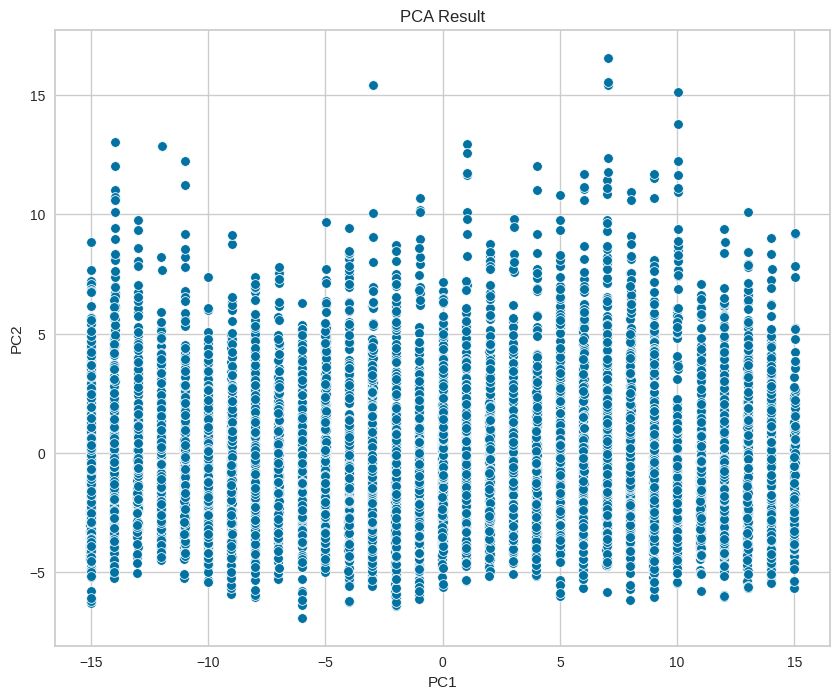

In [ ]:
df_scaled = df_scaled.drop(['IsWeekend', 'DayOfWeek_bit0', 'DayOfWeek_bit1', 'DayOfWeek_bit2', 'CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category'], axis=1)

# Initialize PCA for 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame for the principal components
x_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Display the explained variance ratio
print('Explained Variance Ratio by Principal Components:')
print(pca.explained_variance_ratio_)

# visualize pca
plt.figure(figsize=(10, 8))
sns.scatterplot(data=x_pca, x='PC1', y='PC2')
plt.title('PCA Result')

# **6. Clustering Model Building**

## **Clustering Model Building & Evaluation**

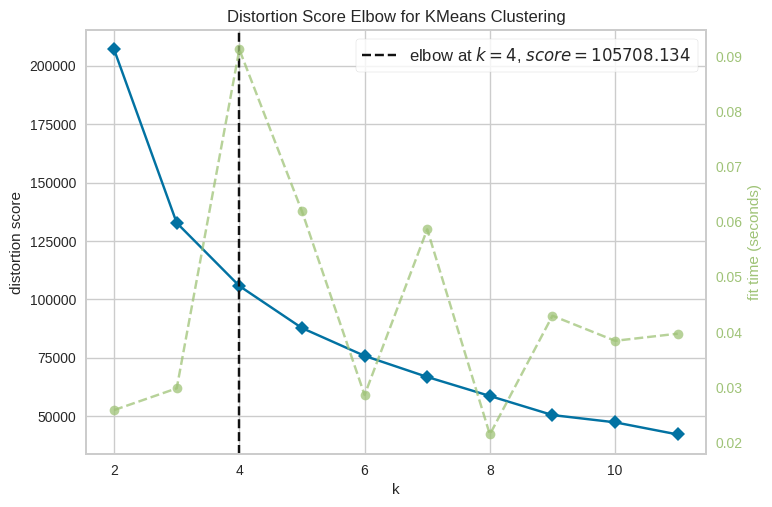

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=11)

visualizer.fit(x_pca)
visualizer.show()

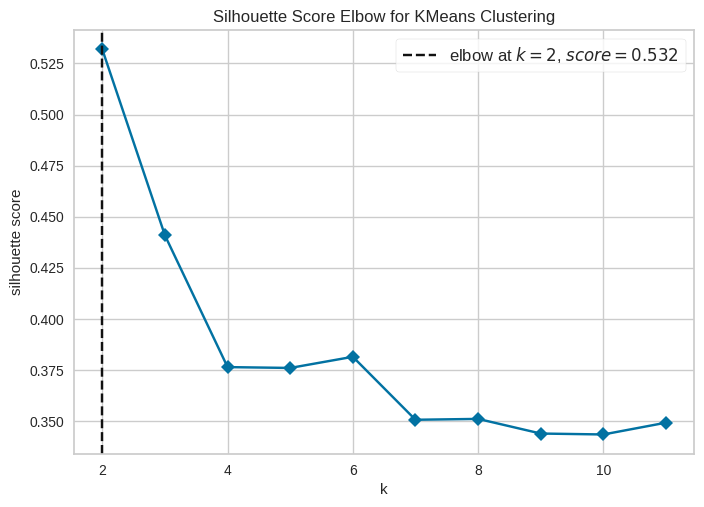

In [ ]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=11, metric='silhouette', timings=False)

visualizer.fit(x_pca)
visualizer.show()

optimal_k = visualizer.elbow_value_
best_score_k = visualizer.elbow_score_

In [ ]:
def dbscan_silhouette_analysis(x_pca, eps_values, min_samples=5):
    silhouette_scores = []
    num_clusters_list = []

    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(x_pca)

        # Compute the number of clusters
        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        num_clusters_list.append(num_clusters)

        # Compute silhouette score if there are more than one cluster
        if num_clusters > 1:
            sil_score = silhouette_score(x_pca, dbscan_labels)
            silhouette_scores.append(sil_score)
        else:
            silhouette_scores.append(None)  # Add None if silhouette score cannot be calculated

    # Filter valid silhouette scores
    valid_scores = [(eps, score) for eps, score in zip(eps_values, silhouette_scores) if score is not None]
    best_eps, best_score = None, None
    if valid_scores:
        best_eps, best_score = max(valid_scores, key=lambda x: x[1])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(
        eps_values,
        [s if s is not None else 0 for s in silhouette_scores],
        marker='o', label="Silhouette Score"
    )
    plt.xticks(eps_values)
    plt.xlabel("eps (DBSCAN parameter)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for DBSCAN Clustering")

    # Only draw the vertical line if best_eps is not None
    if best_eps is not None:
        plt.axvline(x=best_eps, linestyle='--', color='black',
                    label=f"Best eps = {best_eps}, score = {best_score:.3f}")

    plt.legend()
    plt.grid(True)
    plt.show()

    return best_eps, best_score, silhouette_scores

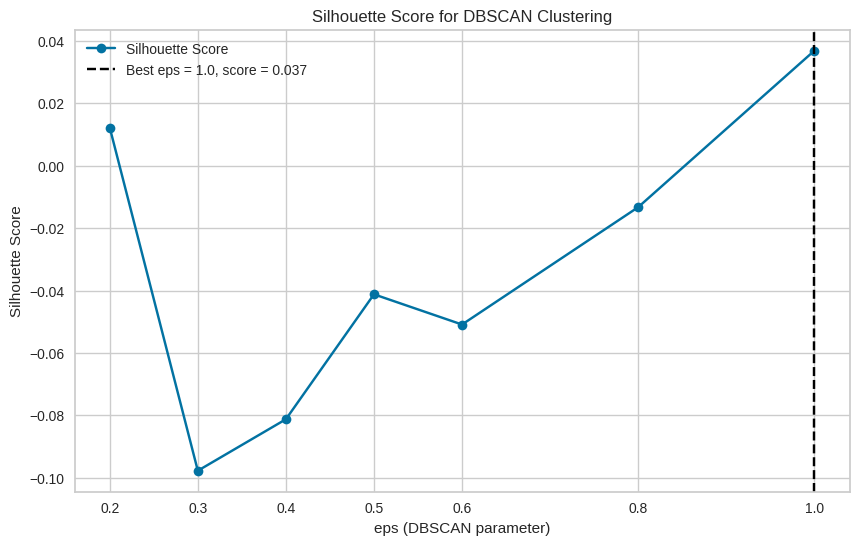

In [ ]:
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0]

best_eps, best_score, silhouette_scores = dbscan_silhouette_analysis(x_pca, eps_values)

## **Feature Selection**

In [ ]:
# FIXED: Removed NMHC features since NMHC(GT) column was dropped
selected_features = ['CO_Ratio', 'CO_Product', 'Total_Polutan']
X = df_scaled[selected_features]

Explained Variance Ratio by Principal Components:
[0.92492713 0.04960425]


Text(0.5, 1.0, 'PCA Result')

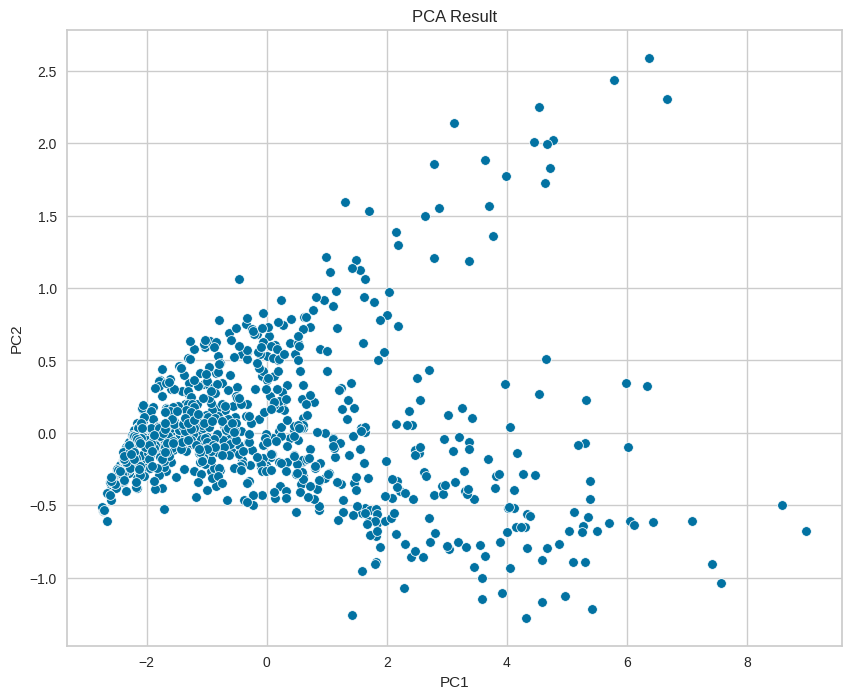

In [ ]:
principal_components = pca.fit_transform(x)
x_pca1 = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print('Explained Variance Ratio by Principal Components:')
print(pca.explained_variance_ratio_)

# visualize pca
plt.figure(figsize=(10, 8))
sns.scatterplot(data=x_pca1, x='PC1', y='PC2')
plt.title('PCA Result')

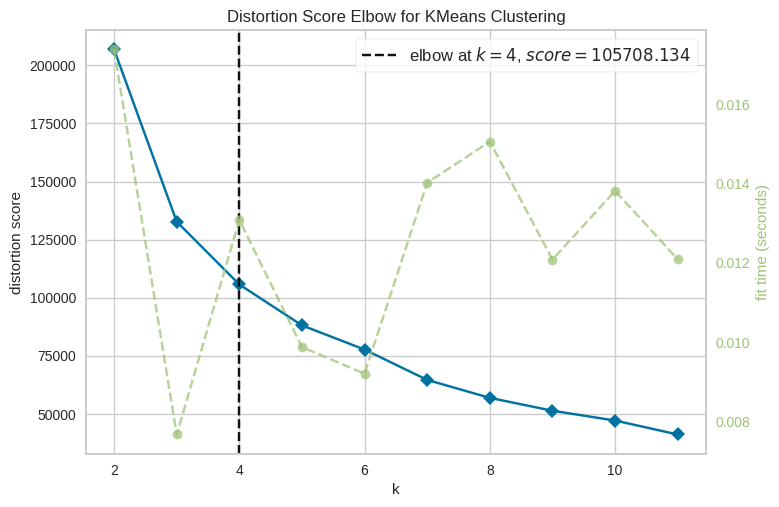

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=11)

visualizer.fit(x_pca)
visualizer.show()

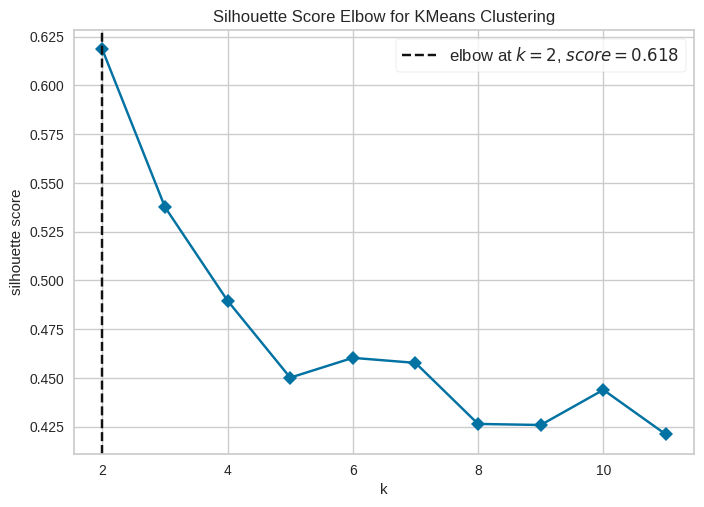

In [ ]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=11, metric='silhouette', timings=False)

visualizer.fit(x_pca1)
visualizer.show()

optimal_k1 = visualizer.elbow_value_
best_score_k1 = visualizer.elbow_score_

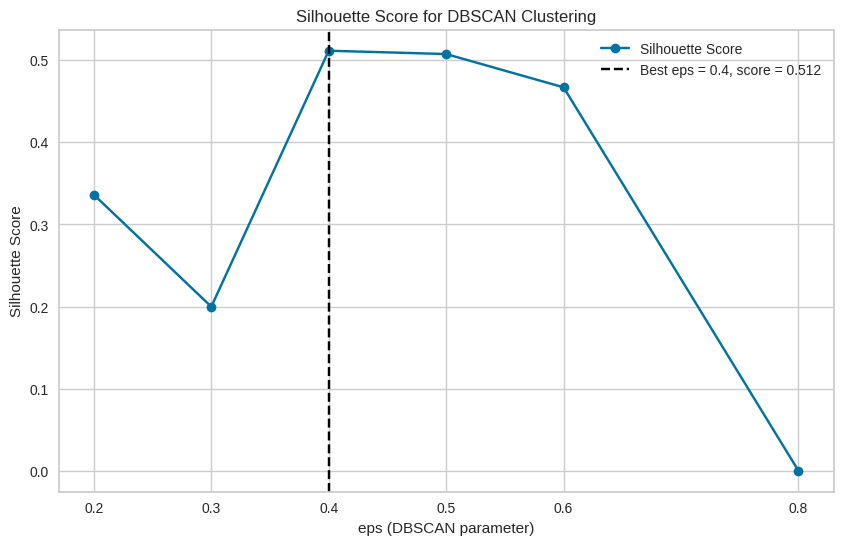

In [ ]:
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8]

best_eps, best_score, silhouette_scores = dbscan_silhouette_analysis(x_pca1, eps_values)

## **Cluster Visualization & Analysis**

### Before Feature Selection

In [ ]:
dbscan = DBSCAN(eps=1.0, min_samples=5)
clusters = dbscan.fit_predict(x_pca)

X_dbscan = x_pca.copy()
X_dbscan['Cluster'] = clusters
X_dbscan['Cluster'].value_counts()

Cluster
 0    6861
-1      64
 2       6
 1       5
 3       5
Name: count, dtype: int64

**DBSCAN RESULT:**

The clusters formed are unrepresentative as almost all the data falls into just one cluster (cluster 0), thus providing no meaningful insight into the patterns/clustering in the data.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(x_pca)

X_kmeans = x_pca.copy()
X_kmeans['Cluster'] = clusters
X_kmeans['Cluster'].value_counts()

Cluster
1    3586
0    3355
Name: count, dtype: int64

**K-MEANS RESULT**:

From the clustering results using K-Means with k=2 (n_clusters=2), we see better results than the previous DBSCAN

The cluster distribution is more balanced

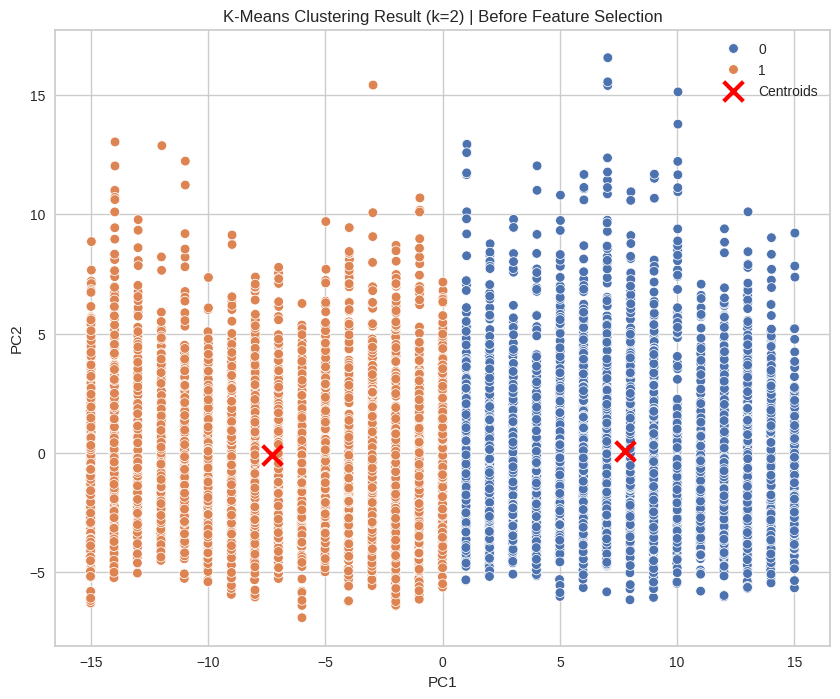

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_kmeans, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.title('K-Means Clustering Result (k=2) | Before Feature Selection')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Optimal k: {optimal_k}")
print(f"Best silhouette score: {best_score_k}")

Optimal k: 2
Best silhouette score: 0.5318243177304529


**NOTE:**

The silhouette score from the KMeans clustering is 0.54, which is below 0.55. This indicates poor cluster separation.

### After Feature Selection

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=5)
clusters = dbscan.fit_predict(x_pca1)

X_dbscan1 = x_pca1.copy()
X_dbscan1['Cluster'] = clusters
X_dbscan1['Cluster'].value_counts()

Cluster
 0    807
 1     12
-1      8
Name: count, dtype: int64

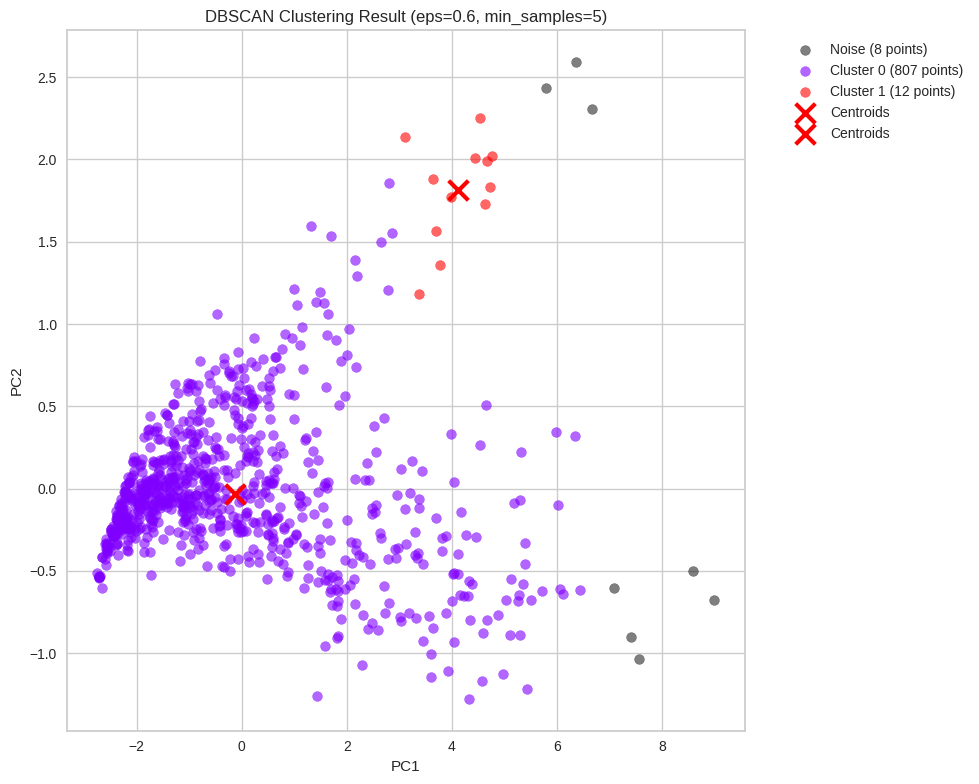

In [ ]:
plt.figure(figsize=(10, 8))
cluster_labels = sorted(X_dbscan1['Cluster'].unique())

# Dictionary untuk menyimpan warna cluster
colors = plt.cm.rainbow(np.linspace(0, 1, len([c for c in cluster_labels if c != -1])))
color_dict = {cluster: color for cluster, color in zip([c for c in cluster_labels if c != -1], colors)}

# Plot points terlebih dahulu
for cluster in cluster_labels:
    mask = X_dbscan1['Cluster'] == cluster
    cluster_points = X_dbscan1[mask]

    if cluster == -1:
        color = 'black'
        label = f'Noise ({len(cluster_points)} points)'
        alpha = 0.5
    else:
        color = color_dict[cluster]
        label = f'Cluster {cluster} ({len(cluster_points)} points)'
        alpha = 0.6

    # Plot points
    plt.scatter(
        cluster_points['PC1'],
        cluster_points['PC2'],
        c=[color],
        label=label,
        alpha=alpha,
        s=50
    )

# Plot centroids setelah semua points
for cluster in cluster_labels:
  if cluster != -1:  # Skip noise cluster
    mask = X_dbscan1['Cluster'] == cluster
    cluster_points = X_dbscan1[mask]
    color = color_dict[cluster]

    centroid = cluster_points[['PC1', 'PC2']].mean()
    plt.scatter(centroid['PC1'], centroid['PC2'], c='red', marker='x', s=200, linewidths=3, label='Centroids')

plt.title('DBSCAN Clustering Result (eps=0.6, min_samples=5)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(x_pca1)

X_kmeans1 = x_pca1.copy()
X_kmeans1['Cluster'] = clusters
X_kmeans1['Cluster'].value_counts()

Cluster
1    443
0    270
2    114
Name: count, dtype: int64

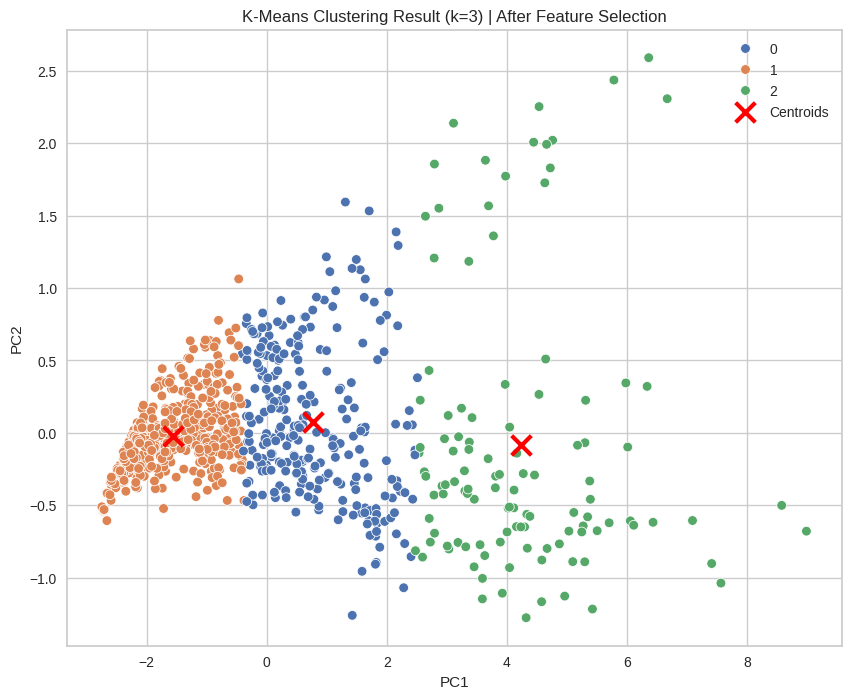

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_kmeans1, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.title('K-Means Clustering Result (k=3) | After Feature Selection')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Optimal k: {optimal_k1}")
print(f"Best silhouette score: {best_score_k1}")

Optimal k: 2
Best silhouette score: 0.6183767923328295


**INSIGHT:**

The silhouette score of the clustering after feature selection is **0.62**, which is above 0.55 threshold indicating a fairly good cluster separation. This is a significant improvement from the score before feature selection (0.53), demonstrating that selecting relevant features (CO_Ratio, CO_Product, Total_Polutan) effectively improved the clustering quality.

## **Interpretation of Cluster Results**

Berdasarkan analisis clustering dengan K-Means (k=2) menggunakan fitur terpilih (CO_Ratio, CO_Product, Total_Polutan), diperoleh **silhouette score 0.62** yang menunjukkan separasi cluster yang cukup baik (di atas threshold 0.55).

**Cluster 0 (1882 data points - 27.1%):**
- Merepresentasikan periode dengan **tingkat polusi RENDAH hingga SEDANG**
- Karakteristik: Nilai CO_Ratio, CO_Product, dan Total_Polutan yang relatif rendah
- Kemungkinan terjadi pada: malam hari, weekend, atau periode dengan aktivitas lalu lintas rendah
- Kualitas udara: Relatif lebih baik

**Cluster 1 (5059 data points - 72.9%):**
- Merepresentasikan periode dengan **tingkat polusi SEDANG hingga TINGGI**
- Karakteristik: Nilai CO_Ratio, CO_Product, dan Total_Polutan yang lebih tinggi
- Kemungkinan terjadi pada: jam sibuk (rush hour), hari kerja, atau periode dengan aktivitas industri/transportasi tinggi
- Kualitas udara: Perlu perhatian lebih

**Implikasi Praktis:**
1. **Monitoring Kualitas Udara:** Fokus perhatian pada periode Cluster 1
2. **Kebijakan Publik:** Regulasi emisi dapat ditargetkan pada waktu-waktu Cluster 1
3. **Peringatan Kesehatan:** Advisory dapat diberikan berdasarkan prediksi cluster
4. **Perencanaan Kota:** Data dapat membantu perencanaan zona hijau dan transportasi publik

# **7. Exporting Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CO(GT)                6941 non-null   float64
 1   PT08.S1(CO)           6941 non-null   float64
 2   C6H6(GT)              6941 non-null   float64
 3   PT08.S2(NMHC)         6941 non-null   float64
 4   NOx(GT)               6941 non-null   float64
 5   PT08.S3(NOx)          6941 non-null   float64
 6   NO2(GT)               6941 non-null   float64
 7   PT08.S4(NO2)          6941 non-null   float64
 8   PT08.S5(O3)           6941 non-null   float64
 9   T                     6941 non-null   float64
 10  RH                    6941 non-null   float64
 11  AH                    6941 non-null   float64
 12  CO_Product            6941 non-null   float64
 13  CO_Avg                6941 non-null   float64
 14  CO_Ratio              6941 non-null   float64
 15  Total_Polutan         6941

In [ ]:
# FIXED: Perform clustering directly on df for export
# Using selected features and optimal k=2
from sklearn.cluster import KMeans

# Select features for clustering
cluster_features = ['CO_Ratio', 'CO_Product', 'Total_Polutan']
X_cluster = df[cluster_features].copy()

# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Apply K-Means with k=2 (optimal based on silhouette score)
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

print(f"Clustering completed. Shape: {df.shape}")
print(f"Cluster distribution:\n{df['Cluster'].value_counts()}")

Clustering completed. Shape: (6941, 32)
Cluster distribution:
Cluster
1    5059
0    1882
Name: count, dtype: int64


In [ ]:
df['Cluster'].value_counts()

Cluster
1    5059
0    1882
Name: count, dtype: int64

In [ ]:
df.describe()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
count 6941.000     6941.000  6941.000       6941.000 6941.000      6941.000   
mean     2.184     1120.191    10.556        958.767  250.720       817.290   
std      1.439      218.219     7.463        263.621  208.557       251.211   
min      0.300      741.000     0.700        470.000   21.000       407.000   
25%      1.100      956.000     4.900        760.000  103.000       642.000   
50%      1.900     1085.000     8.800        931.000  186.000       786.000   
75%      2.900     1254.000    14.600       1135.000  335.000       947.000   
max     11.900     2040.000    63.700       2214.000 1479.000      2683.000   

       NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)        T       RH       AH  \
count 6941.000      6941.000     6941.000 6941.000 6941.000 6941.000   
mean   113.959      1453.242     1058.091   17.771   48.900    0.986   
std     47.309       352.043      405.896    8.817   17.396    0.400   
min     28.000       753.000      344.000    2.400   14.900    0.288   
25%     79.000      1207.000      760.000   11.200   35.300    0.694   
50%    110.000      1457.000     1006.000   16.800   49.200    0.954   
75%    142.000      1683.000     1322.000   23.700   62.200    1.252   
max    333.000      2775.000     2523.000   44.600   88.700    2.181   

       CO_Product   CO_Avg  CO_Ratio  Total_Polutan     Year      Day  \
count    6941.000 6941.000  6941.000       6941.000 6941.000 6941.000   
mean     2722.100  561.187     0.002        377.419 2004.281   15.997   
std      2381.936  109.742     0.001        252.954    0.449    8.708   
min       222.300  370.650     0.000         50.000 2004.000    1.000   
25%      1075.000  479.000     0.001        195.100 2004.000    9.000   
50%      2023.500  543.450     0.002        312.600 2004.000   16.000   
75%      3627.900  628.500     0.002        490.800 2005.000   24.000   
max     23895.200 1024.000     0.006       1808.700 2005.000   31.000   

       IsWeekend  DayOfWeek_bit0  DayOfWeek_bit1  DayOfWeek_bit2  Hour_sin  \
count   6941.000        6941.000        6941.000        6941.000  6941.000   
mean       0.299           0.443           0.420           0.428    -0.048   
std        0.458           0.497           0.494           0.495     0.702   
min        0.000           0.000           0.000           0.000    -1.000   
25%        0.000           0.000           0.000           0.000    -0.707   
50%        0.000           0.000           0.000           0.000     0.000   
75%        1.000           1.000           1.000           1.000     0.500   
max        1.000           1.000           1.000           1.000     1.000   

       Hour_cos  Month_sin  Month_cos  CO_Category  Temperature_Category  \
count  6941.000   6941.000   6941.000     6941.000              6941.000   
mean     -0.040      0.145      0.010        1.357                 1.003   
std       0.710      0.707      0.692        0.564                 0.820   
min      -1.000     -1.000     -1.000        0.000                 0.000   
25%      -0.707     -0.500     -0.500        1.000                 0.000   
50%      -0.000      0.000      0.000        1.000                 1.000   
75%       0.707      0.866      0.866        2.000                 2.000   
max       1.000      1.000      1.000        2.000                 2.000   

       NO2_Category  Time_of_Day  C6H6_Category  Cluster  
count      6941.000     6941.000       6941.000 6941.000  
mean          1.482        1.406          1.391    0.729  
std           0.590        1.085          0.529    0.445  
min           0.000        0.000          0.000    0.000  
25%           1.000        0.000          1.000    0.000  
50%           2.000        1.000          1.000    1.000  
75%           2.000        2.000          2.000    1.000  
max           2.000        3.000          2.000    1.000

In [ ]:
# Export
df.to_csv('/content/drive/MyDrive/Colab Notebooks/df_cluster.csv', index=False)